In [1]:
# Reading the data 
import pandas as pd 

# Preprocessing 
from sklearn.model_selection import train_test_split

# Visualizing 
import matplotlib.pyplot as plt 

# Building the model 
from sklearn.ensemble import BaggingRegressor

# Reading the data 

In [2]:
data = pd.read_csv('../data/kc_house_data.csv')

# Extracting Features 

In [3]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors']
X = data[features].values
y = data['price'].values

# Splitting the data 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Creating and training the model

In [5]:
#Creating the model 
reg = BaggingRegressor(n_estimators=100, random_state=42)
#Training the model 
reg.fit(X_train, y_train)

BaggingRegressor(n_estimators=100, random_state=42)

# Predicting on the model

In [6]:
X_train[0].reshape(-1,1)

array([[3.0000e+00],
       [1.7500e+00],
       [1.7800e+03],
       [1.3095e+04],
       [1.0000e+00]])

In [7]:
train_pred = reg.predict(X_train)
test_pred = reg.predict(X_test)

individual_pred = reg.predict(X_train[0].reshape(1,5))
print(f'The prediction on individual example was {individual_pred[0]} whereas actual value was {y_train[0]}')

The prediction on individual example was 354688.66666666674 whereas actual value was 325000.0


# Evaluating the model

In [8]:
r_sq_train = reg.score(X_train, y_train)
r_sq_test = reg.score(X_test, y_test)

print(f'The R squared for train set is {r_sq_train} and for test set is {r_sq_test}')

The R squared for train set is 0.939532741609383 and for test set is 0.5037027481232426


# Hyperparameter tuning 

In [9]:
train_rsquared = []
test_rsquared = []

for i in range(1,151):
    reg_loop = BaggingRegressor(n_estimators=i, random_state=42) #building a regressor with specified depth
    reg_loop.fit(X_train, y_train) #fitting the regressor 
    train_rsq_loop = reg_loop.score(X_train, y_train) #seeing r^2 for train set 
    test_rsq_loop = reg_loop.score(X_test, y_test) #seeing r^2 for test set 
    train_rsquared.append(train_rsq_loop) #appending the r^2 for train set 
    test_rsquared.append(test_rsq_loop) #appending the r^2 for test set 

# Seeing the score for individual n_estimators

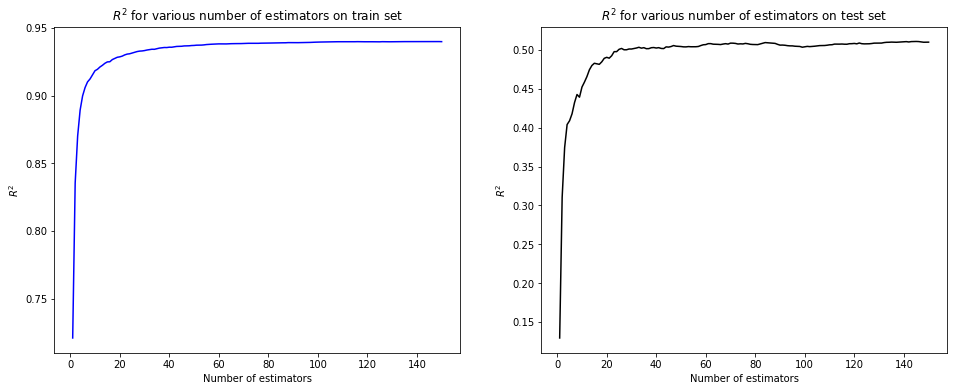

In [10]:
estimators = [i for i in range(1,151)]
fig, ax = plt.subplots(figsize=(16,6),nrows=1, ncols=2)
ax[0].plot(estimators, train_rsquared,color='blue')
ax[0].set_xlabel('Number of estimators')
ax[0].set_ylabel(r'$R^2$')
ax[0].set_title(r'$R^2$ for various number of estimators on train set')
ax[1].plot(estimators, test_rsquared,color='black')
ax[1].set_xlabel('Number of estimators')
ax[1].set_ylabel(r'$R^2$')
ax[1].set_title(r'$R^2$ for various number of estimators on test set')
plt.show()